# **5.3: Sequence Text Classification using LSTM**

**Course Name:** MDM | Deep Learning

**Lab Title:** Time Series Forecasting using LSTM

**Student Name:** Kaustubh Wagh

**Student ID:** 202201070021

**Date of Submission:** 22nd April 2025

**Group Members**: Jayesh Deshmukh, Alvin Abraham, Kaustubh Wagh

## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

### Loading and Preprocessing the IMDb Dataset

1. **Dataset**: The IMDb dataset is loaded, with the `num_words` parameter set to limit the dataset to the top 10,000 most frequent words.
2. **Padding Sequences**: The sequences (reviews) are padded to a maximum length of 200 words to standardize the input size.
3. **Training and Testing Data**: The dataset is split into training and testing sets, and the shape of the resulting data is displayed.

This prepares the dataset for further model training.


In [2]:
# Load the IMDb dataset (training data and testing data)
max_words = 10000  # Limit the dataset to the top 10,000 most frequent words
max_len = 200  # Maximum sequence length

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad the sequences to make them the same length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000, 200)
Testing data shape: (25000, 200)


### Model Architecture

1. **Embedding Layer**:
   - Converts the input sequences of word indices into dense vectors of size 128.
   - `input_dim` is set to `max_words` (10,000), and the `input_length` is set to `max_len` (200).
   
2. **LSTM Layer**:
   - LSTM with 128 units, applying dropout to prevent overfitting.
   - `dropout=0.2` for input dropout and `recurrent_dropout=0.2` for recurrent dropout.
   
3. **Dense Layer**:
   - A dense output layer with a single unit and `sigmoid` activation function for binary classification.
   
4. **Compilation**:
   - The model is compiled using the Adam optimizer with binary crossentropy loss for binary classification, and accuracy is used as the evaluation metric.

This architecture is designed for binary text classification, such as sentiment analysis.


In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
ep = 5
history = model.fit(x_train, y_train, epochs=ep, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 326s 808ms/step - accuracy: 0.6942 - loss: 0.5671 - val_accuracy: 0.8316 - val_loss: 0.3912
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 275s 699ms/step - accuracy: 0.8589 - loss: 0.3419 - val_accuracy: 0.8607 - val_loss: 0.3403
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 322s 701ms/step - accuracy: 0.8810 - loss: 0.2915 - val_accuracy: 0.8592 - val_loss: 0.3630
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 323s 705ms/step - accuracy: 0.9029 - loss: 0.2422 - val_accuracy: 0.8374 - val_loss: 0.3840
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 360s 802ms/step - accuracy: 0.9258 - loss: 0.2027 - val_accuracy: 0.8514 - val_loss: 0.4392


In [5]:
ep = 5
history = model.fit(x_train, y_train, epochs=ep, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 313s 802ms/step - accuracy: 0.9440 - loss: 0.1558 - val_accuracy: 0.8584 - val_loss: 0.4068
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 328s 817ms/step - accuracy: 0.9587 - loss: 0.1181 - val_accuracy: 0.8484 - val_loss: 0.4259
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 324s 823ms/step - accuracy: 0.9550 - loss: 0.1248 - val_accuracy: 0.8578 - val_loss: 0.4420
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 323s 824ms/step - accuracy: 0.9710 - loss: 0.0853 - val_accuracy: 0.8512 - val_loss: 0.4782
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 378s 816ms/step - accuracy: 0.9747 - loss: 0.0761 - val_accuracy: 0.8508 - val_loss: 0.5480


### Model Evaluation

- **Test Accuracy**: Displays the accuracy of the model on the test data.
- **Classification Report**: Shows precision, recall, F1-score, and support for both classes (Negative/Positive).
- **Confusion Matrix**: Visualizes the model's classification performance, highlighting correct and incorrect predictions.


782/782 - 84s - 108ms/step - accuracy: 0.8508 - loss: 0.5480
Test accuracy: 0.8507999777793884
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 110ms/step
              precision    recall  f1-score   support

           0       0.87      0.83      0.85     12500
           1       0.84      0.87      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



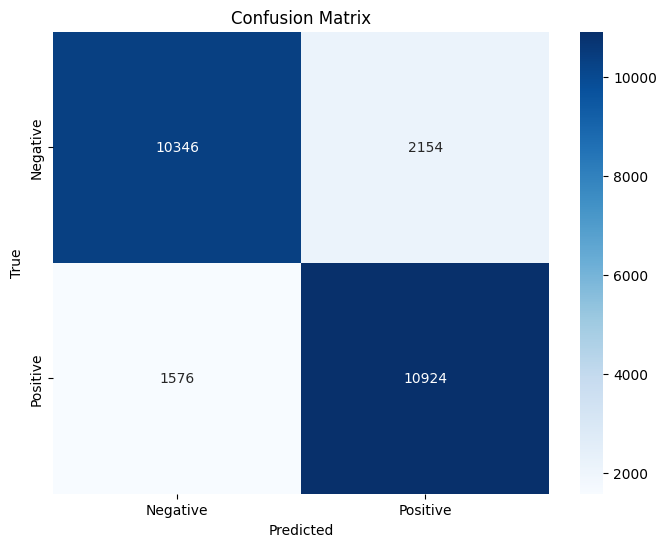

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Classification Report
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Plot Training History

- **Accuracy Plot**: Displays the training and validation accuracy across epochs.
- **Loss Plot**: Shows the training and validation loss throughout the training process.


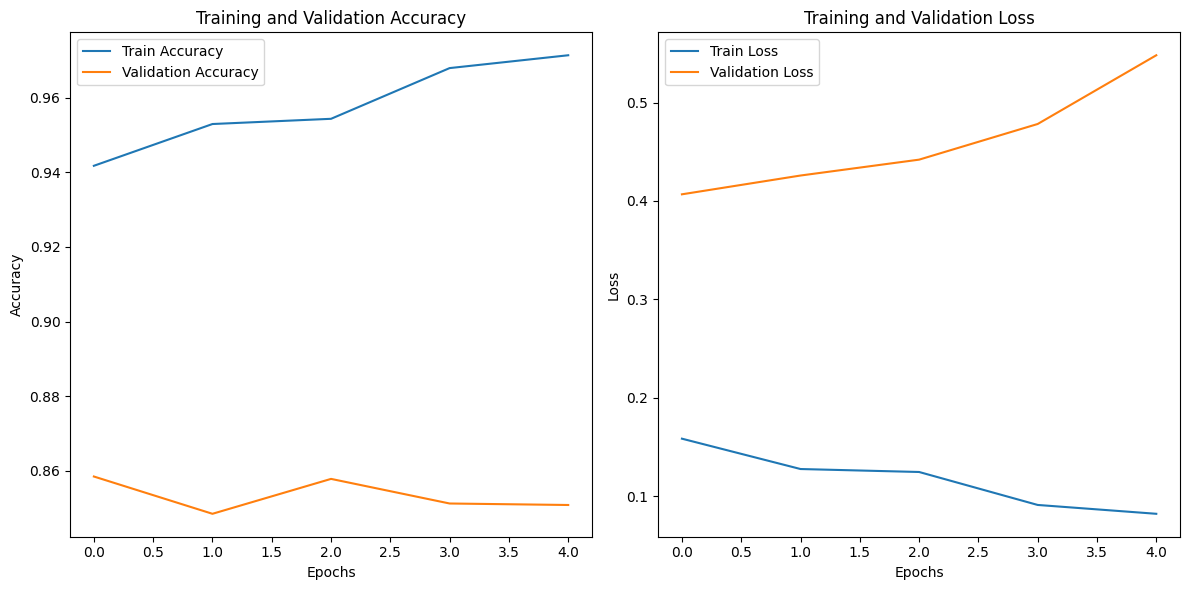

In [7]:
# Plot training history
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


### Sentiment Prediction Function

- **`predict_sentiment(review)`**: This function takes a review as input, preprocesses it by tokenizing the words, and predicts the sentiment using the trained LSTM model.
- **Outputs**: Returns `"Positive"` if the sentiment is above 0.5, otherwise returns `"Negative"`.


In [71]:
def predict_sentiment(review):
    review_seq = imdb.get_word_index()
    review = review.lower().split()
    review = [review_seq[word] if word in review_seq else 0 for word in review]
    review = pad_sequences([review], maxlen=max_len)

    prediction = model.predict(review)
    print(prediction)
    return "Positive" if prediction >= 0.5 else "Negative"

# Example usage:
print(predict_sentiment("This movie was absolutely fantastic!"))
print(predict_sentiment("The movie lacked any real emotion or depth."))
print(predict_sentiment("The pacing was slow and boring ! I almost slept"))
print(predict_sentiment("The ending was okay okay"))
print(predict_sentiment("Loved the movie, would totally recommend"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
[[0.90199745]]
Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
[[0.23018025]]
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
[[0.39681304]]
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
[[0.4146155]]
Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
[[0.89722097]]
Positive


**Declaration**

I, Kaustubh Wagh, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/kostawagh/DeepLearningMDM

Signature: Kaustubh Yashwant Wagh